In [4]:
#Necessary Imports for EDA
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
def EDA(path):
    monthly = dd.read_csv(path, sep='|',
                          header=None, dtype={23: 'object',
                                              24: 'object',
                                              28: 'object',
                                              29: 'object',
                                              3: 'object',
                                              7: 'object'})
    
    monthly.columns = ["loan_sequence_number", "monthly_reporting_period", "current_actual_upb",
                       "current_loan_delinquency_status", "loan_age",
                       "remaining_months_to_maturity",
                       "repurchase_flag", "modification_flag", "zero_balance_code",
                       "zero_balance_effective_date", "current_interest_rate",
                       "current_deferred_upb",
                       "due_date_last_installment",
                       "insurance_recoveries", "net_sales_proceeds", "non_insurance_recoveries",
                       "expenses",
                       "legal_costs", "maintenance_costs", "taxes_and_insurance", "misc_expenses",
                       "actual_loss", "modification_cost", "step_modification_flag",
                       "deferred_payment_modification", "loan_to_value", "zero_balance_removal_upb",
                       "delinquent_accrued_interest" ,"del_disaster" ,"borrower_assistance" ,"month_mod_cost"
                       ,"interest_bearing"]
    print("First 5 rows of the dataset")
    display(monthly.head())
    print("Number of Rows: " + str(monthly.shape[0].compute()))
    print(" ")
    summary = monthly.describe()
    print("Summary Statistics:")
    display(summary.compute())

    print("Since the dataset is so large, it's better to take a sample. This will make the EDA process faster")
    print(" ")

    month_sub = monthly.sample(frac=0.1, random_state=42).compute()  # Adjust frac according to your needs

    print("Distribution of Numerical Columns")
    for column in month_sub.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(month_sub[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
    print(" ")
    print("Proportion of Nulls in the dataframe")
    nans = month_sub.isna().sum( )/ month_sub.shape[0]
    display(nans)
    print(" ")

    # Create a list with columns with nan values
    nan_cols = []
    for i in range(len(nans)):
        if nans[i] >0:
            nan_cols.append(nans.index[i])

    # Divide Columns into categorical and numerical lists
    cat_nulls = ['repurchase_flag',
                 'modification_flag',
                 'zero_balance_code',
                 'zero_balance_effective_date',
                 'due_date_last_installment',
                 'step_modification_flag',
                 'deferred_payment_modification',
                 'loan_to_value',
                 'del_disaster',
                 'borrower_assistance']
    num_nulls = ['insurance_recoveries',
                 'net_sales_proceeds',
                 'non_insurance_recoveries',
                 'legal_costs',
                 'maintenance_costs',
                 'taxes_and_insurance',
                 'misc_expenses',
                 'actual_loss',
                 'modification_cost',
                 'zero_balance_removal_upb',
                 'delinquent_accrued_interest',
                 'month_mod_cost']

    print("Conduct a Chi Square test to check if null values in one column are dependent on another column. Then display which columns are dependent on each other.")
    missingness_df = pd.DataFrame()
    col1 = []
    col2 = []
    dependent = []
    from scipy.stats import chi2_contingency
    for i in cat_nulls:
        for j in nan_cols:
            observed = pd.crosstab(month_sub[i].isnull(), month_sub[j].isnull())
            chi2, p, dof, expected = chi2_contingency(observed)
            if p < 0.05:
                dependent.append(True)
            else:
                dependent.append(False)
            col1.append(i)
            col2.append(j)

    missingness_df['column_1'] = col1
    missingness_df['column_2'] = col2
    missingness_df['dependent'] = dependent

    display(missingness_df.head(10))
    print(" ")

    print("Check correlations for numerical columns")
    sns.heatmap(month_sub[num_nulls].corr(), annot=True, cmap= 'magma', fmt='.2f')

First 5 rows of the dataset


,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_maturity,repurchase_flag,modification_flag,zero_balance_code,zero_balance_effective_date,...,modification_cost,step_modification_flag,deferred_payment_modification,loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,del_disaster,borrower_assistance,month_mod_cost,interest_bearing
0,F09Q10000001,200903,274000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274000.0
1,F09Q10000001,200904,274000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274000.0
2,F09Q10000001,200905,274000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274000.0
3,F09Q10000001,200906,273000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273000.0
4,F09Q10000001,200907,273000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273000.0


Number of Rows: 34150513
 
Summary Statistics:


,monthly_reporting_period,current_actual_upb,loan_age,remaining_months_to_maturity,repurchase_flag,zero_balance_code,zero_balance_effective_date,current_interest_rate,current_deferred_upb,due_date_last_installment,...,maintenance_costs,taxes_and_insurance,misc_expenses,actual_loss,modification_cost,loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,month_mod_cost,interest_bearing
count,3.415051e+07,3.415051e+07,3.415051e+07,3.415051e+07,1141.000000,593110.000000,593109.000000,3.415051e+07,3.415051e+07,47615.000000,...,5379.000000,5379.000000,5379.000000,5410.000000,4011.000000,4.042721e+06,5.931100e+05,6543.000000,251304.000000,3.415051e+07
mean,2.012337e+05,1.792234e+05,4.208316e+01,2.865958e+02,201188.929010,1.209103,201280.206557,4.907218e+00,3.915063e+01,201888.561231,...,-5732.103612,-7059.068210,-938.392389,-67886.694651,8222.330132,1.453618e+02,1.976966e+05,13302.523917,131.298271,1.791842e+05
std,3.225698e+02,1.078897e+05,3.819135e+01,7.821757e+01,181.832281,3.598379,285.346969,3.749404e-01,1.526580e+03,355.886338,...,9201.310395,12867.582522,2349.803295,64966.979413,15748.831269,3.044590e+02,1.132996e+05,18436.119250,258.691078,1.078661e+05
min,2.009010e+05,0.000000e+00,0.000000e+00,-8.000000e+00,200904.000000,1.000000,200901.000000,2.000000e+00,0.000000e+00,200901.000000,...,-103648.880000,-269438.080000,-77988.440000,-735370.080000,-25035.310000,1.000000e+00,1.000000e-02,-1446.430000,-737.800000,0.000000e+00
25%,2.010090e+05,1.216138e+05,1.700000e+01,2.940000e+02,201107.000000,1.000000,201111.000000,4.750000e+00,0.000000e+00,201911.000000,...,-3906.970000,-5484.797500,-731.462500,-70089.780000,602.925000,3.000000e+01,1.447927e+05,4046.882500,2.890000,1.216002e+05
50%,2.012040e+05,1.890568e+05,3.600000e+01,3.330000e+02,201206.250000,1.000000,201211.000000,4.875000e+00,0.000000e+00,202010.000000,...,-365.390000,-2420.100000,-290.000000,-36951.395000,4743.685000,4.400000e+01,2.163284e+05,10591.080000,114.625000,1.890541e+05
75%,2.015040e+05,3.120000e+05,7.100000e+01,3.500000e+02,201406.000000,1.000000,201504.000000,5.375000e+00,0.000000e+00,202109.000000,...,0.000000,0.000000,-145.000000,-9865.530000,19651.800000,6.700000e+01,3.391482e+05,21715.430000,294.925000,3.119829e+05
max,2.023030e+05,1.078000e+06,1.700000e+02,5.490000e+02,202007.000000,96.000000,202303.000000,7.875000e+00,1.970322e+05,203905.000000,...,500.000000,182580.940000,19626.290000,86720.730000,373262.340000,9.990000e+02,1.015495e+06,287715.400000,50779.680000,1.078000e+06


Since the dataset is so large, it's better to take a sample. This will make the EDA process faster
 
Distribution of Numerical Columns


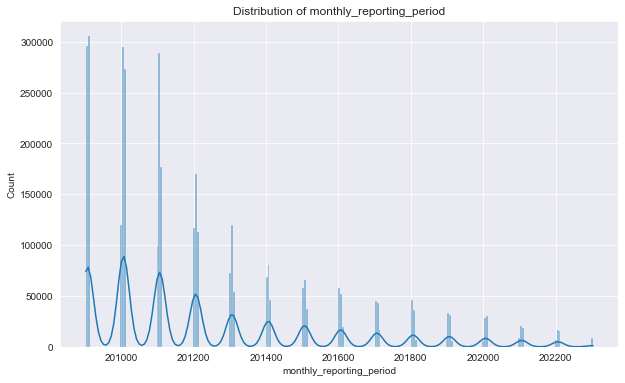

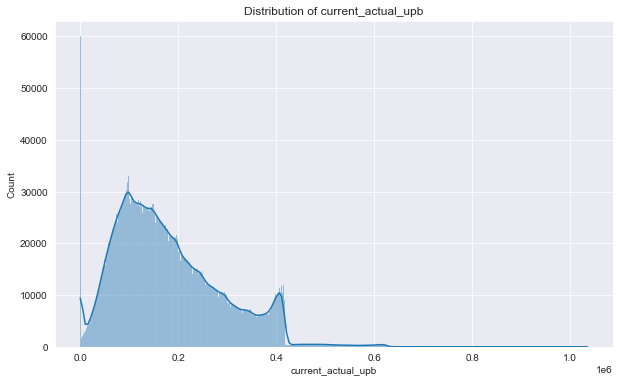

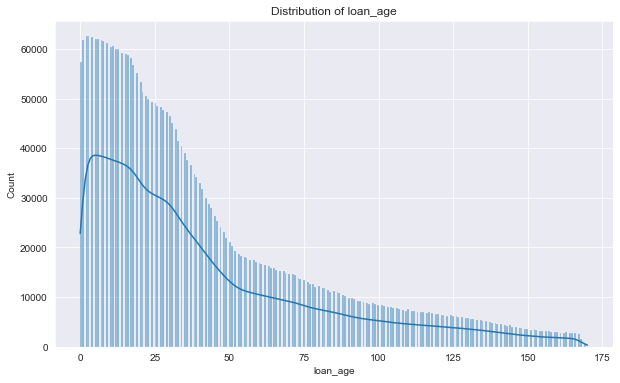

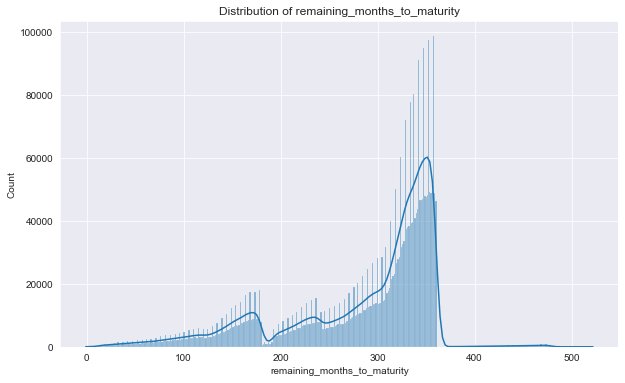

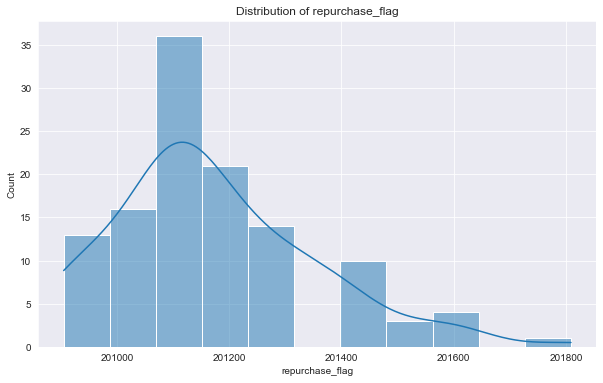

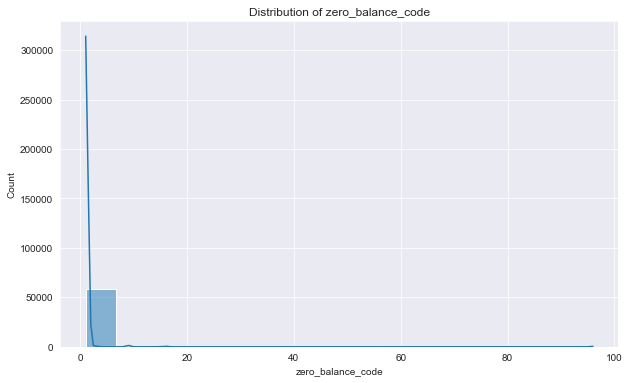

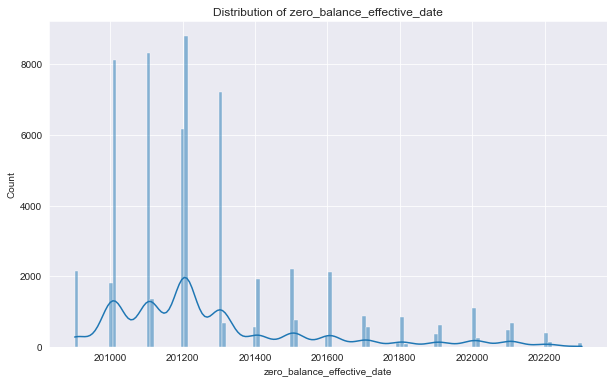

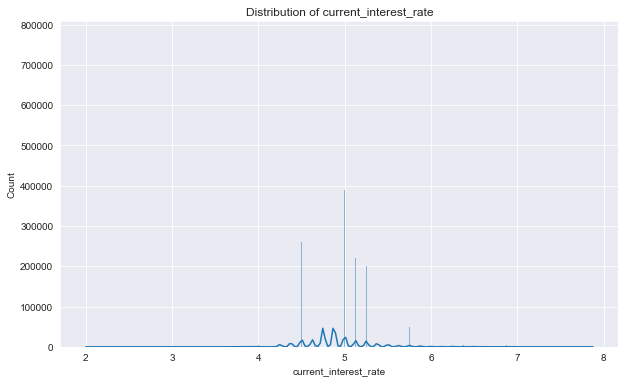

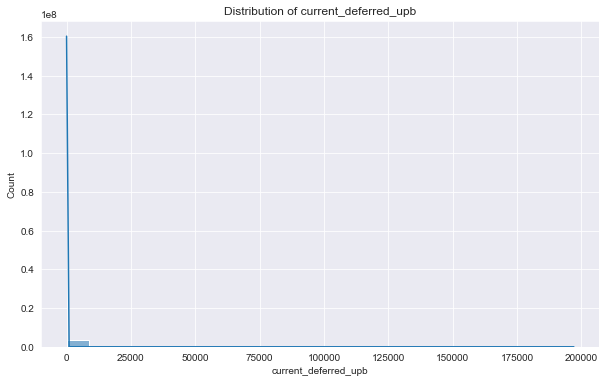

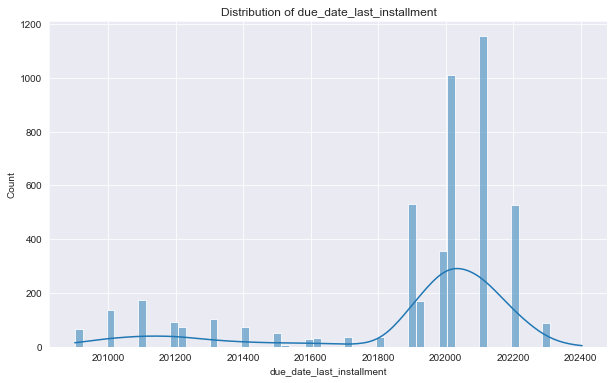

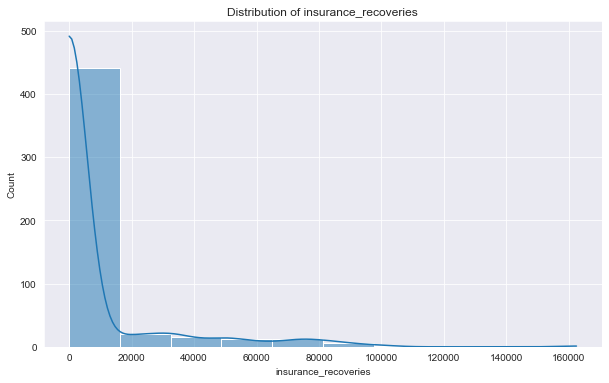

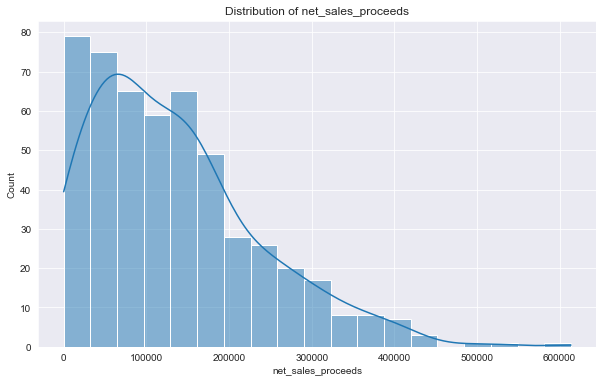

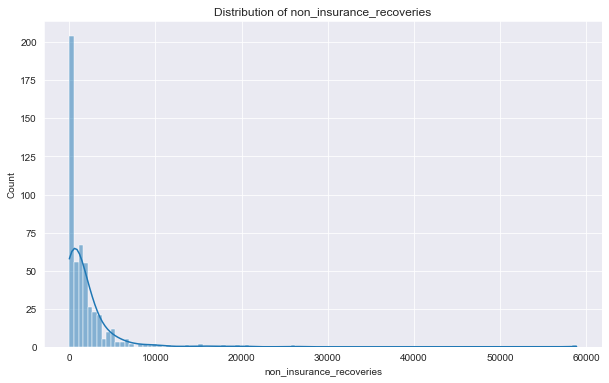

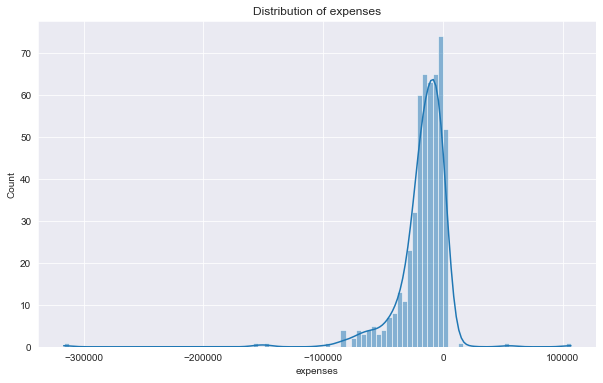

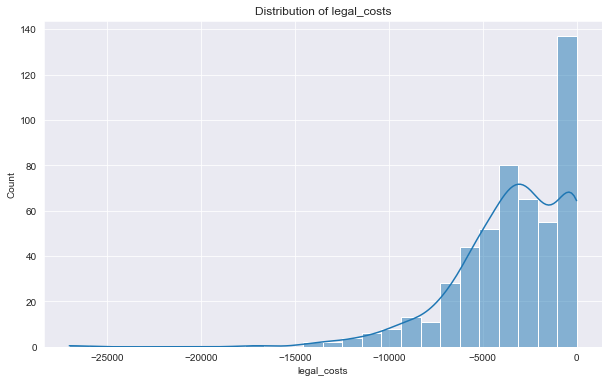

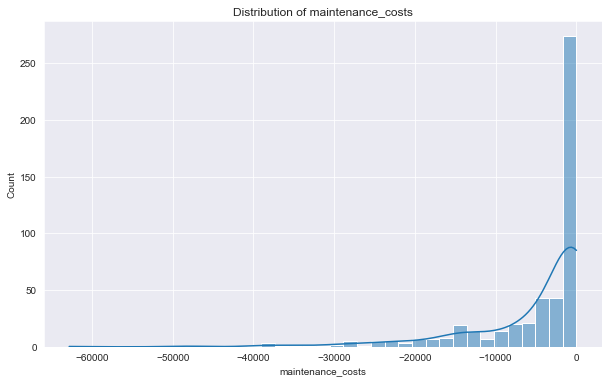

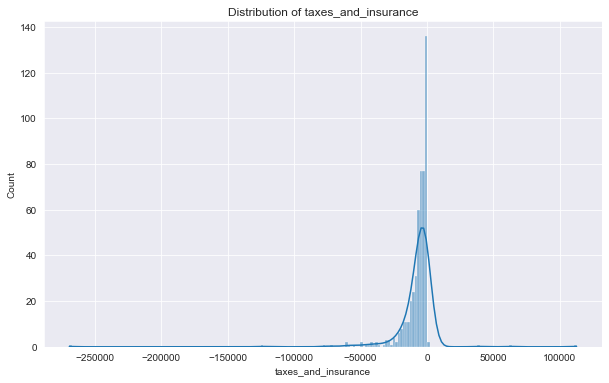

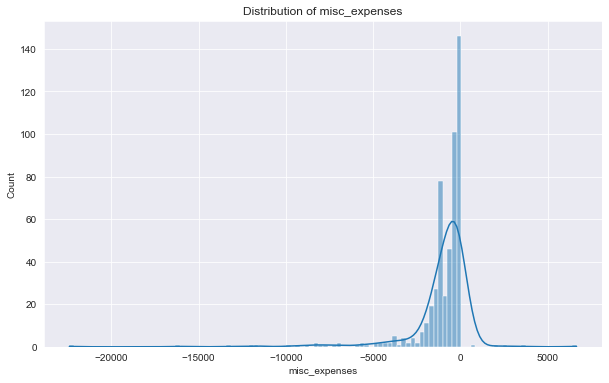

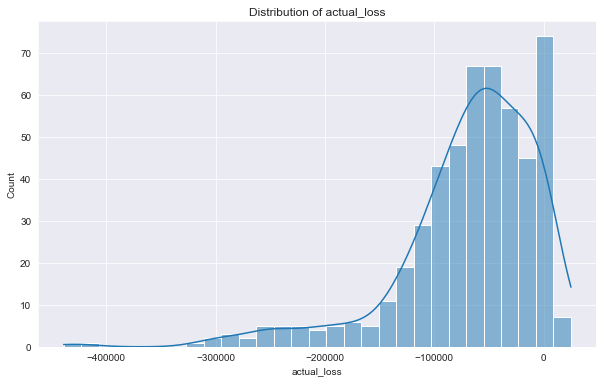

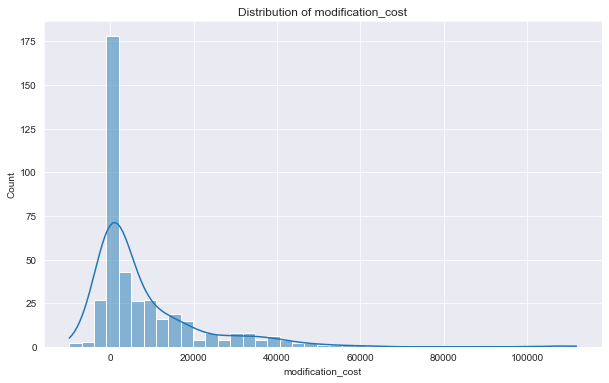

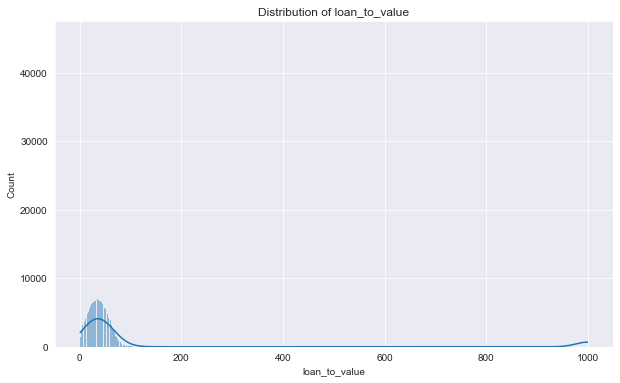

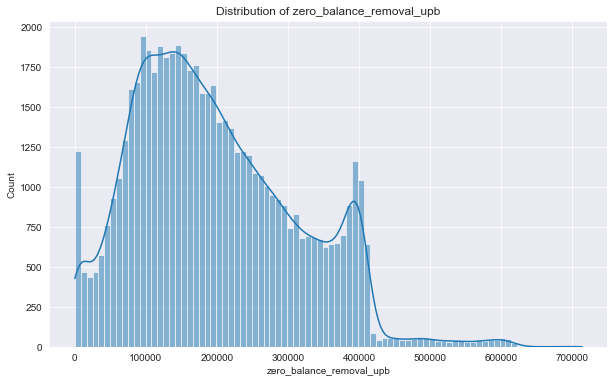

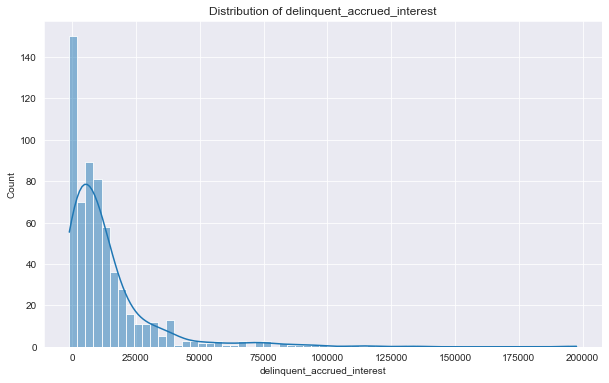

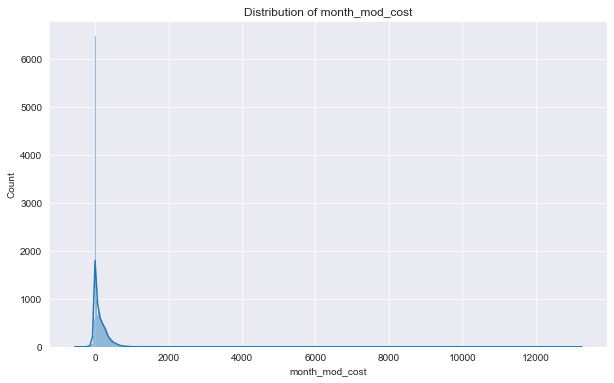

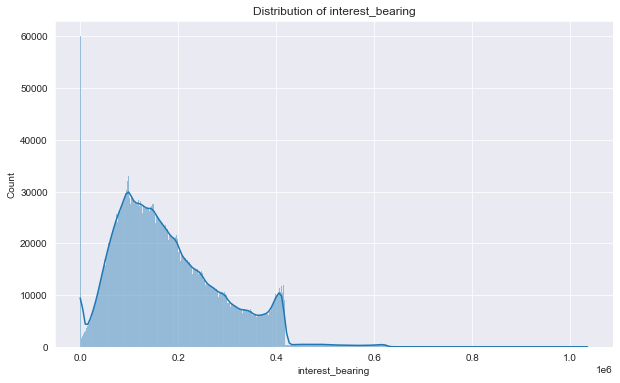

 
Proportion of Nulls in the dataframe


loan_sequence_number               0.000000
monthly_reporting_period           0.000000
current_actual_upb                 0.000000
current_loan_delinquency_status    0.000000
loan_age                           0.000000
remaining_months_to_maturity       0.000000
repurchase_flag                    0.999965
modification_flag                  0.993444
zero_balance_code                  0.982708
zero_balance_effective_date        0.982708
current_interest_rate              0.000000
current_deferred_upb               0.000000
due_date_last_installment          0.998605
insurance_recoveries               0.999851
net_sales_proceeds                 0.999850
non_insurance_recoveries           0.999851
expenses                           0.999851
legal_costs                        0.999851
maintenance_costs                  0.999851
taxes_and_insurance                0.999851
misc_expenses                      0.999851
actual_loss                        0.999850
modification_cost               

 
Conduct a Chi Square test to check if null values in one column are dependent on another column. Then display which columns are dependent on each other.


,column_1,column_2,dependent
0,repurchase_flag,repurchase_flag,True
1,repurchase_flag,modification_flag,True
2,repurchase_flag,zero_balance_code,True
3,repurchase_flag,zero_balance_effective_date,True
4,repurchase_flag,due_date_last_installment,True
5,repurchase_flag,insurance_recoveries,True
6,repurchase_flag,net_sales_proceeds,True
7,repurchase_flag,non_insurance_recoveries,True
8,repurchase_flag,expenses,True
9,repurchase_flag,legal_costs,True


 
Check correlations for numerical columns


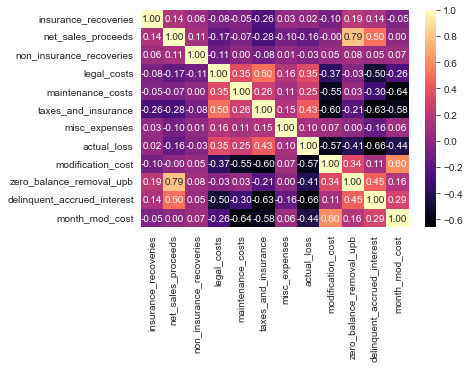

In [5]:
EDA('/Users/riyamhatre/Downloads/historical_data_2009Q1/historical_data_time_2009Q1.txt')